In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime
import os

# Set plot style
plt.style.use('ggplot')
sns.set(font_scale=1.2)

# Load the dataset
file_path = "../data/Resale Flat Prices (Based on Approval Date), 1990 - 1999.csv"
df = pd.read_csv(file_path)

# Display the first few rows to understand the data
print("Dataset Overview:")
display(df.head())

# Check basic info
print("\nDataset Information:")
display(df.info())

# Summary statistics
print("\nSummary Statistics:")
display(df.describe())

Dataset Overview:


,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price
0,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000
1,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000
2,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,8000
3,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,IMPROVED,1977,6000
4,1990-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,NEW GENERATION,1976,47200



Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287196 entries, 0 to 287195
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   month                287196 non-null  object 
 1   town                 287196 non-null  object 
 2   flat_type            287196 non-null  object 
 3   block                287196 non-null  object 
 4   street_name          287196 non-null  object 
 5   storey_range         287196 non-null  object 
 6   floor_area_sqm       287196 non-null  float64
 7   flat_model           287196 non-null  object 
 8   lease_commence_date  287196 non-null  int64  
 9   resale_price         287196 non-null  int64  
dtypes: float64(1), int64(2), object(7)
memory usage: 21.9+ MB


None


Summary Statistics:


,floor_area_sqm,lease_commence_date,resale_price
count,287196.000000,287196.000000,287196.00000
mean,93.351778,1983.206897,219541.67471
std,27.361872,6.085632,128145.25346
min,28.000000,1967.000000,5000.00000
25%,68.000000,1979.000000,127000.00000
50%,91.000000,1984.000000,195000.00000
75%,113.000000,1987.000000,298000.00000
max,307.000000,1997.000000,900000.00000


Missing values in each column:


month                  0
town                   0
flat_type              0
block                  0
street_name            0
storey_range           0
floor_area_sqm         0
flat_model             0
lease_commence_date    0
resale_price           0
approval_date          0
dtype: int64

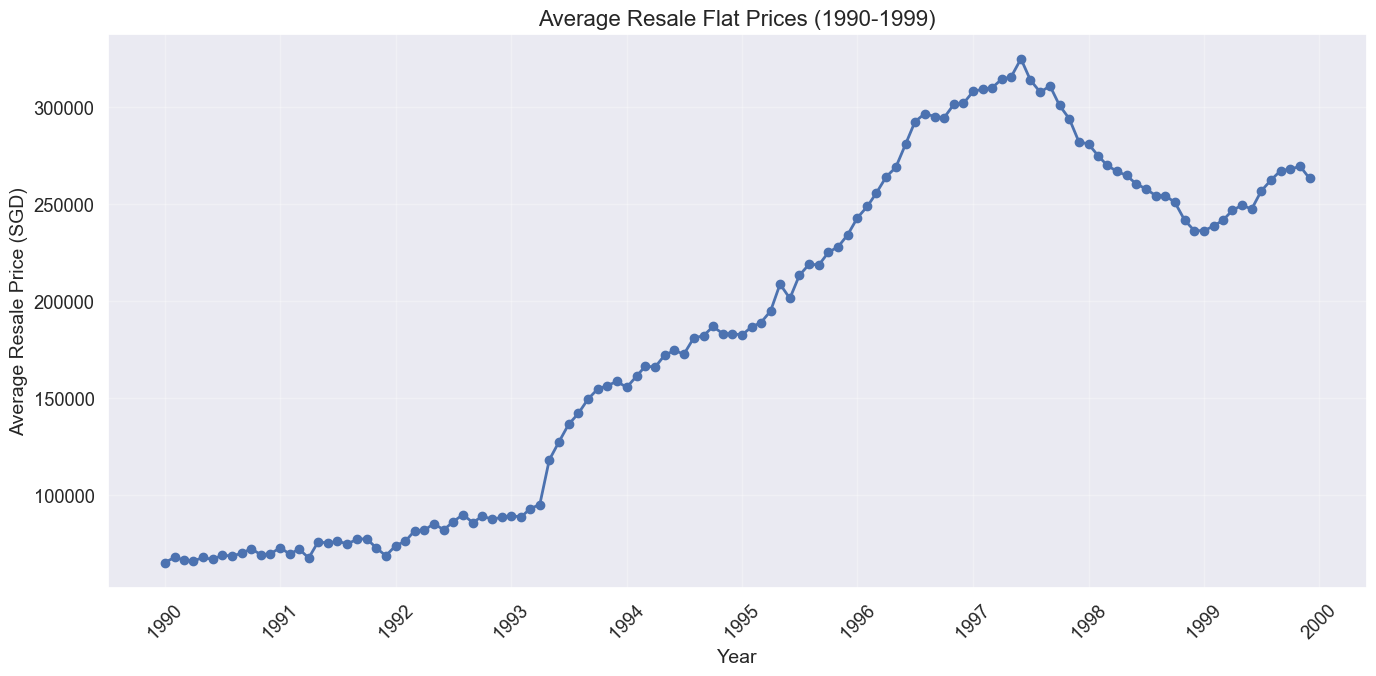

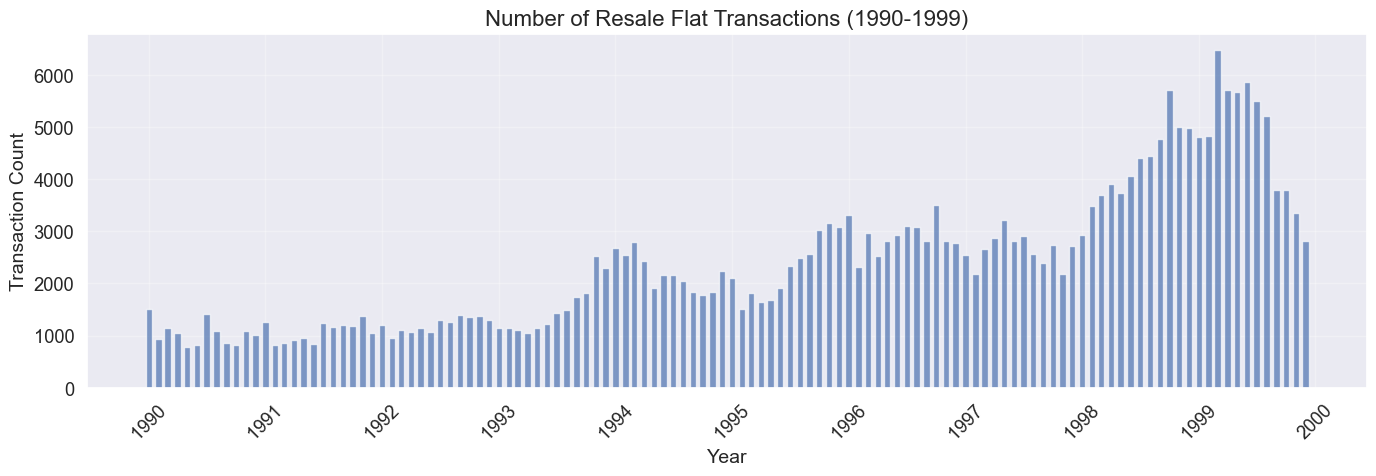

In [18]:
# Data preprocessing
# Convert month to datetime for time series analysis
df['approval_date'] = pd.to_datetime(df['month'], format='%Y-%m')

# Check for missing values
print("Missing values in each column:")
display(df.isnull().sum())

# Aggregate data by month
monthly_avg = df.groupby('approval_date')['resale_price'].mean().reset_index()
monthly_count = df.groupby('approval_date')['resale_price'].count().reset_index()
monthly_count.columns = ['approval_date', 'transaction_count']

# Plot resale price over time
plt.figure(figsize=(14, 7))
plt.plot(monthly_avg['approval_date'], monthly_avg['resale_price'], marker='o', linestyle='-', linewidth=2)
plt.title('Average Resale Flat Prices (1990-1999)', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Average Resale Price (SGD)', fontsize=14)
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot transaction volume over time
plt.figure(figsize=(14, 5))
plt.bar(monthly_count['approval_date'], monthly_count['transaction_count'], width=20, alpha=0.7)
plt.title('Number of Resale Flat Transactions (1990-1999)', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Transaction Count', fontsize=14)
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

/var/folders/q5/fvpf7hdn6856crg46p1mkjrm0000gn/T/ipykernel_78550/488005434.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='flat_type', y='resale_price', data=df, palette='viridis')


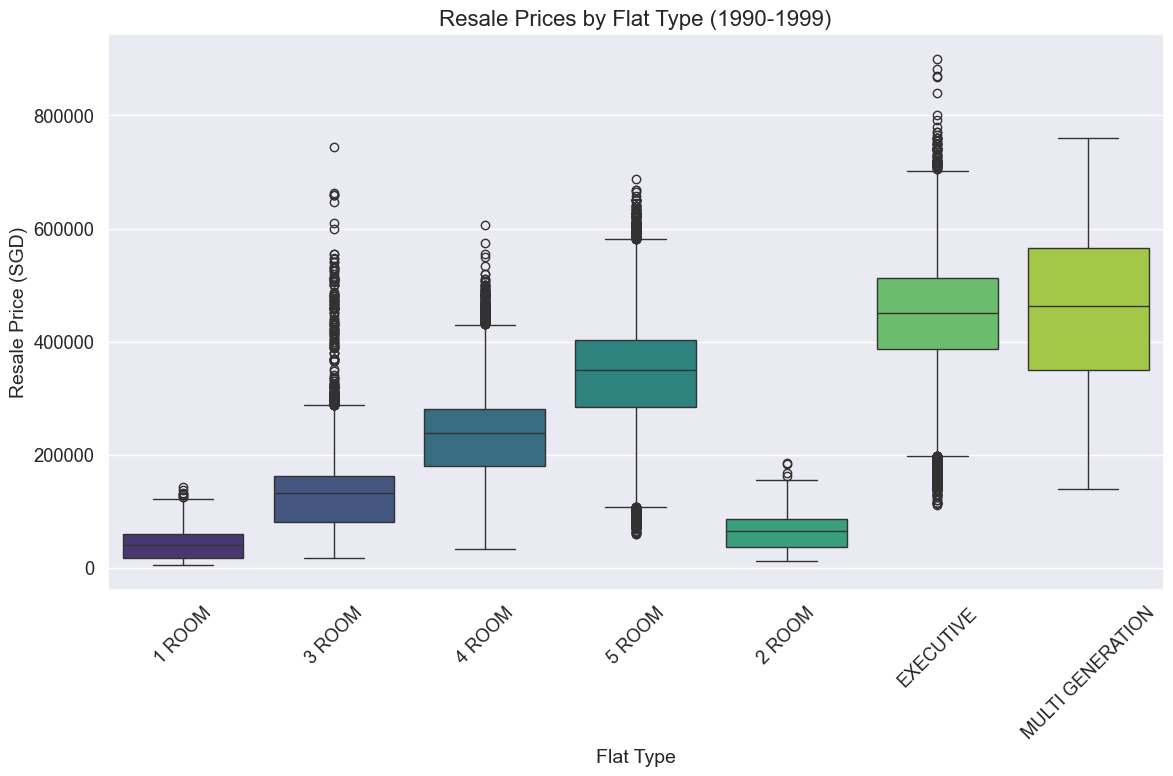

/var/folders/q5/fvpf7hdn6856crg46p1mkjrm0000gn/T/ipykernel_78550/488005434.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='town', y='resale_price', data=town_avg, palette='viridis')


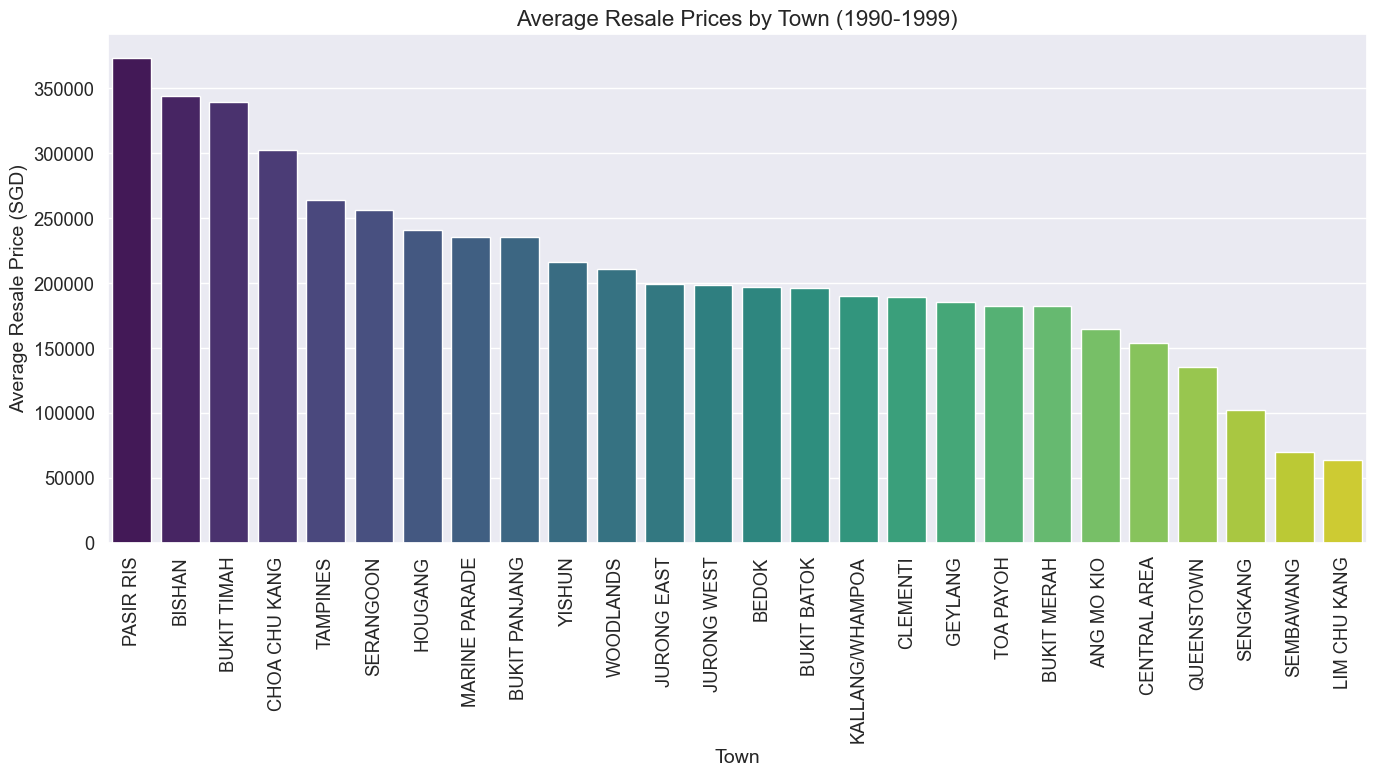

In [19]:
# Additional analysis - price by flat type and town
# Box plot of resale prices by flat type
plt.figure(figsize=(12, 8))
sns.boxplot(x='flat_type', y='resale_price', data=df, palette='viridis')
plt.title('Resale Prices by Flat Type (1990-1999)', fontsize=16)
plt.xlabel('Flat Type', fontsize=14)
plt.ylabel('Resale Price (SGD)', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Analyze trends by town
town_avg = df.groupby('town')['resale_price'].mean().sort_values(ascending=False).reset_index()

plt.figure(figsize=(14, 8))
sns.barplot(x='town', y='resale_price', data=town_avg, palette='viridis')
plt.title('Average Resale Prices by Town (1990-1999)', fontsize=16)
plt.xlabel('Town', fontsize=14)
plt.ylabel('Average Resale Price (SGD)', fontsize=14)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

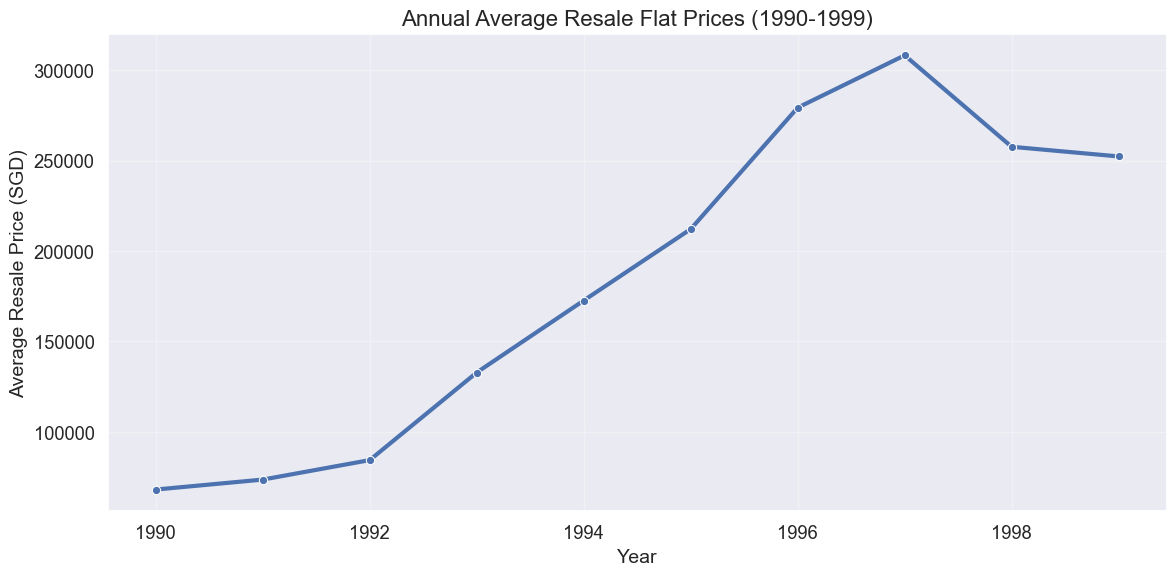

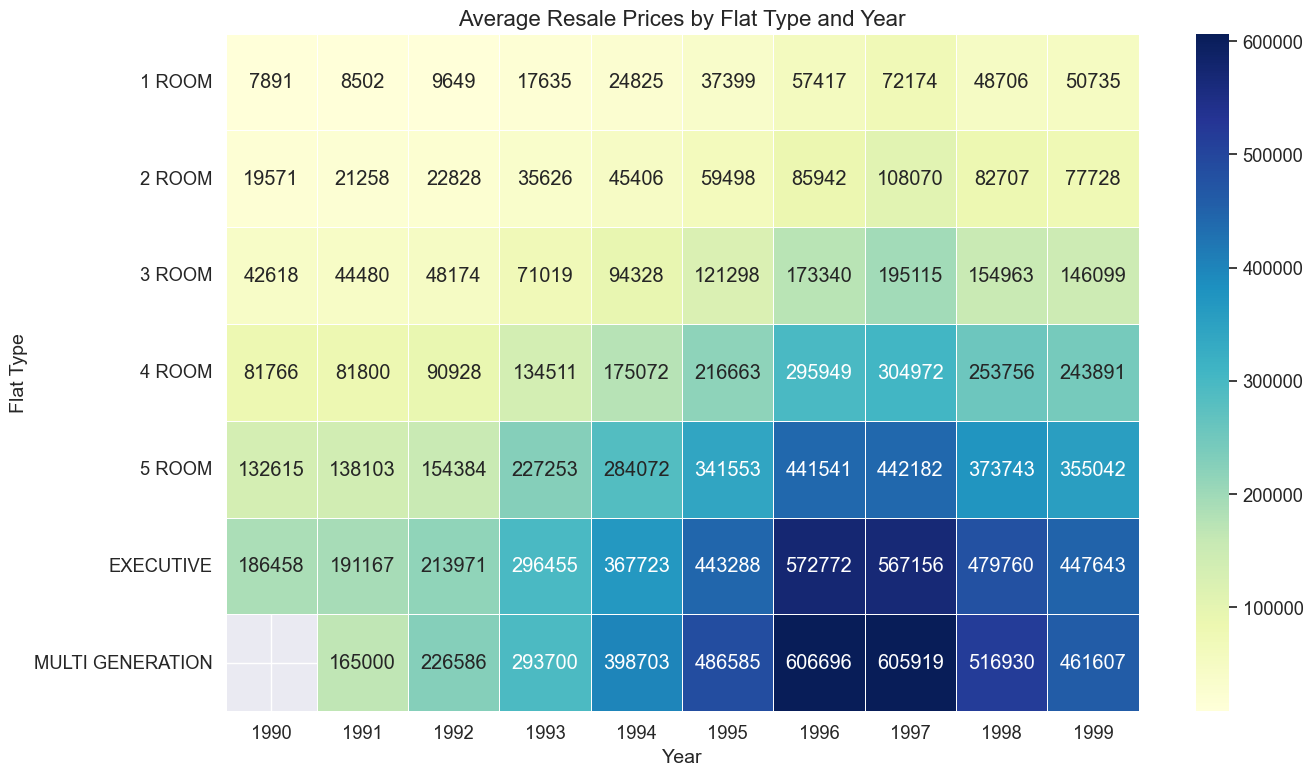

In [20]:
# Time series analysis - annual trends
df['year'] = df['approval_date'].dt.year
yearly_avg = df.groupby('year')['resale_price'].mean().reset_index()

# Plot yearly trend
plt.figure(figsize=(12, 6))
sns.lineplot(x='year', y='resale_price', data=yearly_avg, marker='o', linewidth=3)
plt.title('Annual Average Resale Flat Prices (1990-1999)', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Average Resale Price (SGD)', fontsize=14)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Heatmap of average prices by year and flat type
year_flat_type = df.groupby(['year', 'flat_type'])['resale_price'].mean().reset_index()
year_flat_type_pivot = year_flat_type.pivot(index='flat_type', columns='year', values='resale_price')

plt.figure(figsize=(14, 8))
sns.heatmap(year_flat_type_pivot, annot=True, fmt='.0f', cmap='YlGnBu', linewidths=0.5)
plt.title('Average Resale Prices by Flat Type and Year', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Flat Type', fontsize=14)
plt.tight_layout()
plt.show()

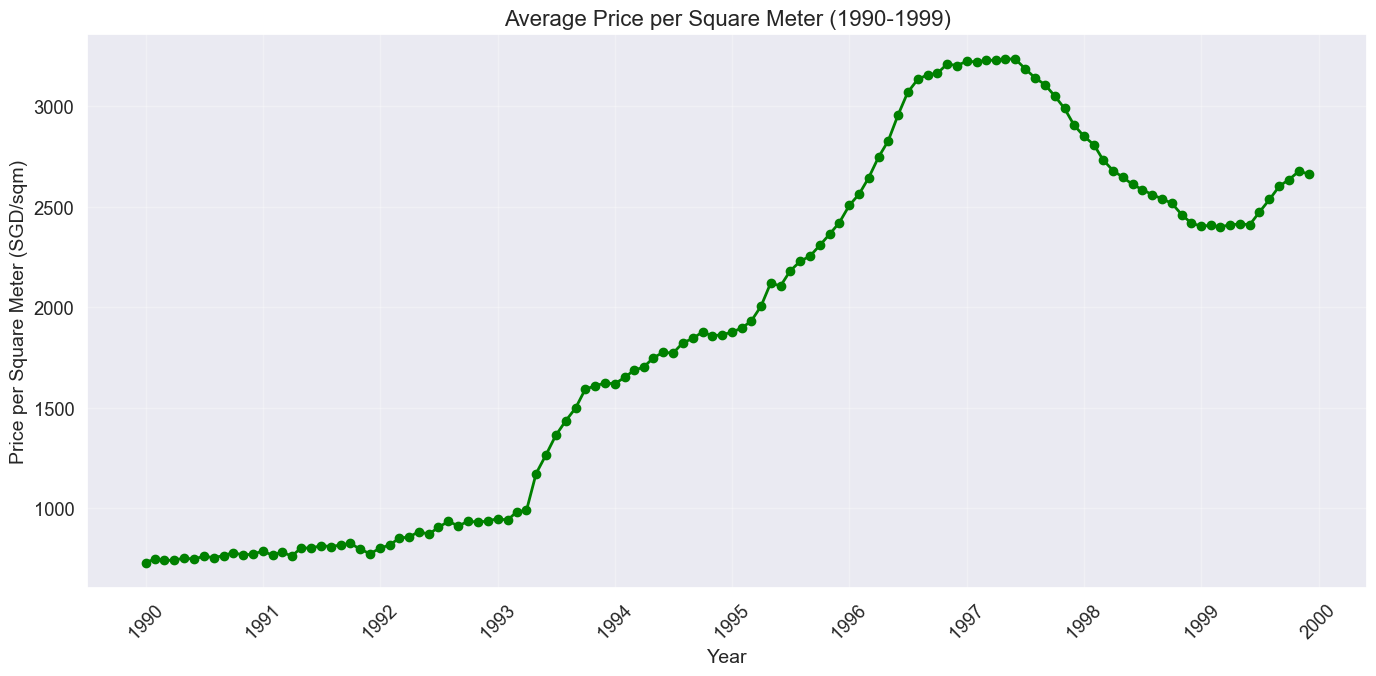

/var/folders/q5/fvpf7hdn6856crg46p1mkjrm0000gn/T/ipykernel_78550/533436781.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='flat_type', y='price_per_sqm', data=df, palette='plasma')


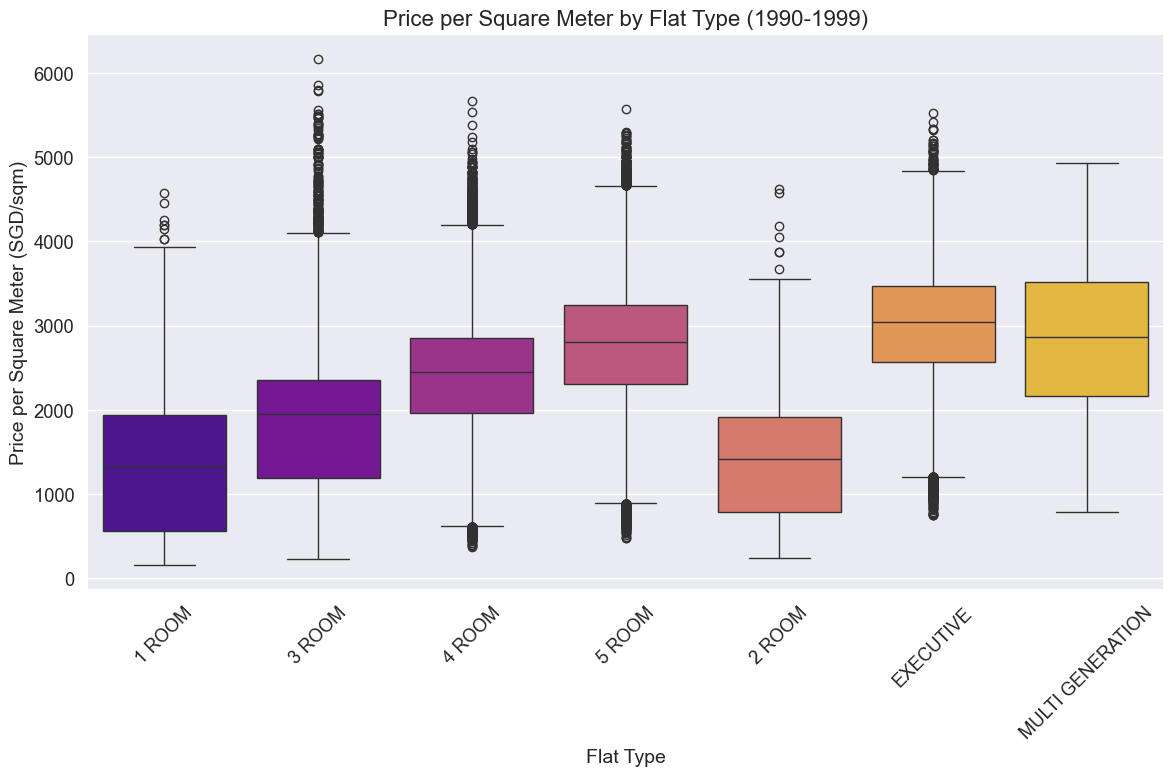

In [21]:
# Analyze price per square meter
if 'floor_area_sqm' in df.columns:
    df['price_per_sqm'] = df['resale_price'] / df['floor_area_sqm']
    
    # Price per sqm over time
    monthly_price_per_sqm = df.groupby('approval_date')['price_per_sqm'].mean().reset_index()
    
    plt.figure(figsize=(14, 7))
    plt.plot(monthly_price_per_sqm['approval_date'], monthly_price_per_sqm['price_per_sqm'], 
             marker='o', linestyle='-', linewidth=2, color='green')
    plt.title('Average Price per Square Meter (1990-1999)', fontsize=16)
    plt.xlabel('Year', fontsize=14)
    plt.ylabel('Price per Square Meter (SGD/sqm)', fontsize=14)
    plt.grid(True, alpha=0.3)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    
    # Price per sqm by flat type
    plt.figure(figsize=(12, 8))
    sns.boxplot(x='flat_type', y='price_per_sqm', data=df, palette='plasma')
    plt.title('Price per Square Meter by Flat Type (1990-1999)', fontsize=16)
    plt.xlabel('Flat Type', fontsize=14)
    plt.ylabel('Price per Square Meter (SGD/sqm)', fontsize=14)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [22]:
# Load additional datasets
file_paths = [
    "../data/Resale Flat Prices (Based on Approval Date), 1990 - 1999.csv",
    "../data/Resale Flat Prices (Based on Approval Date), 2000 - Feb 2012.csv",
    "../data/Resale Flat Prices (Based on Registration Date), From Mar 2012 to Dec 2014.csv",
    "../data/Resale Flat Prices (Based on Registration Date), From Jan 2015 to Dec 2016.csv",
    "../data/Resale flat prices based on registration date from Jan-2017 onwards.csv"
]

# Initialize an empty list to store dataframes
dataframes = []

# Load each dataset and append to the list
for file_path in file_paths:
    try:
        temp_df = pd.read_csv(file_path)
        print(f"Successfully loaded: {file_path}")
        dataframes.append(temp_df)
    except FileNotFoundError:
        print(f"File not found: {file_path}")
    except Exception as e:
        print(f"Error loading {file_path}: {e}")

# Check if we have any dataframes to combine
if dataframes:
    # Standardize column names (they might differ between datasets)
    # Inspect column names in each dataframe
    for i, df in enumerate(dataframes):
        print(f"\nDataset {i+1} columns: {df.columns.tolist()}")
    
    # Combine all dataframes
    combined_df = pd.concat(dataframes, ignore_index=True)
    
    # Use the combined dataframe for analysis
    df = combined_df
    print(f"\nCombined dataframe shape: {df.shape}")
    
    # Display the first few rows of the combined dataframe
    display(df.head())
else:
    print("No dataframes to combine. Using the original 1990-1999 dataset.")

Successfully loaded: ../data/Resale Flat Prices (Based on Approval Date), 1990 - 1999.csv
Successfully loaded: ../data/Resale Flat Prices (Based on Approval Date), 2000 - Feb 2012.csv
Successfully loaded: ../data/Resale Flat Prices (Based on Registration Date), From Mar 2012 to Dec 2014.csv
Successfully loaded: ../data/Resale Flat Prices (Based on Registration Date), From Jan 2015 to Dec 2016.csv
Successfully loaded: ../data/Resale flat prices based on registration date from Jan-2017 onwards.csv

Dataset 1 columns: ['month', 'town', 'flat_type', 'block', 'street_name', 'storey_range', 'floor_area_sqm', 'flat_model', 'lease_commence_date', 'resale_price']

Dataset 2 columns: ['month', 'town', 'flat_type', 'block', 'street_name', 'storey_range', 'floor_area_sqm', 'flat_model', 'lease_commence_date', 'resale_price']

Dataset 3 columns: ['month', 'town', 'flat_type', 'block', 'street_name', 'storey_range', 'floor_area_sqm', 'flat_model', 'lease_commence_date', 'resale_price']

Dataset 4 co

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease
0,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000.0,NaN
1,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000.0,NaN
2,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,8000.0,NaN
3,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,IMPROVED,1977,6000.0,NaN
4,1990-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,NEW GENERATION,1976,47200.0,NaN


Possible date columns: ['month', 'lease_commence_date']


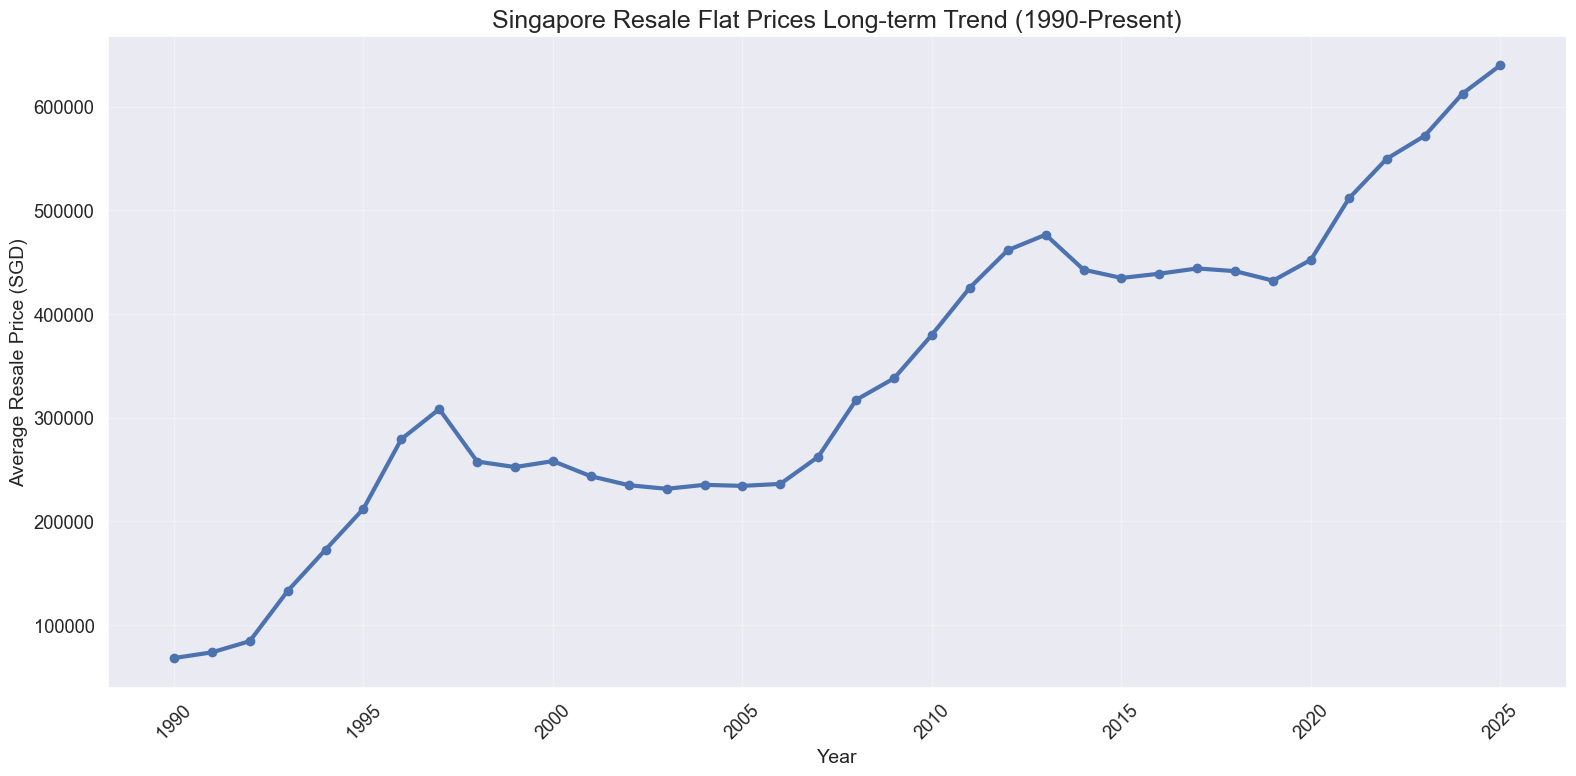

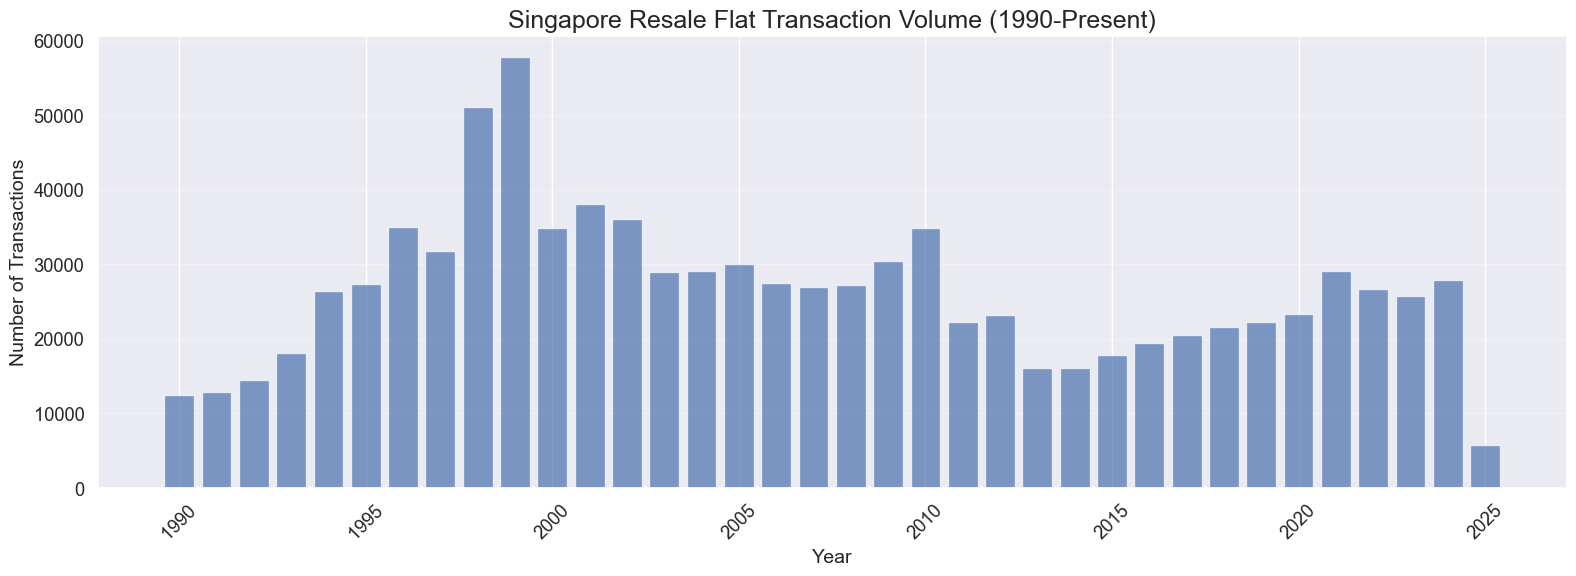

In [23]:
# Ensure date columns are properly formatted
# First check what date columns we have in the combined dataset
date_columns = [col for col in df.columns if 'date' in col.lower() or 'month' in col.lower()]
print(f"Possible date columns: {date_columns}")

# Create a uniform date column for analysis
if 'month' in df.columns:
    df['transaction_date'] = pd.to_datetime(df['month'], format='%Y-%m', errors='coerce')
elif 'resale_registration_date' in df.columns:
    df['transaction_date'] = pd.to_datetime(df['resale_registration_date'], errors='coerce')
elif 'approval_date' in df.columns:
    df['transaction_date'] = pd.to_datetime(df['approval_date'], errors='coerce')
else:
    # Try to find any date column and use it
    for col in date_columns:
        df['transaction_date'] = pd.to_datetime(df[col], errors='coerce')
        if not df['transaction_date'].isna().all():
            break

# Extract year for analysis
df['year'] = df['transaction_date'].dt.year

# Long-term trend analysis
yearly_avg = df.groupby('year')['resale_price'].mean().reset_index()
yearly_count = df.groupby('year')['resale_price'].count().reset_index()
yearly_count.columns = ['year', 'transaction_count']

# Plot the long-term price trend
plt.figure(figsize=(16, 8))
plt.plot(yearly_avg['year'], yearly_avg['resale_price'], marker='o', linewidth=3)
plt.title('Singapore Resale Flat Prices Long-term Trend (1990-Present)', fontsize=18)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Average Resale Price (SGD)', fontsize=14)
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot transaction volume over the years
plt.figure(figsize=(16, 6))
plt.bar(yearly_count['year'], yearly_count['transaction_count'], alpha=0.7)
plt.title('Singapore Resale Flat Transaction Volume (1990-Present)', fontsize=18)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of Transactions', fontsize=14)
plt.grid(True, alpha=0.3, axis='y')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

/var/folders/q5/fvpf7hdn6856crg46p1mkjrm0000gn/T/ipykernel_78550/903819741.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='decade_label', y='resale_price', data=df, palette='viridis')


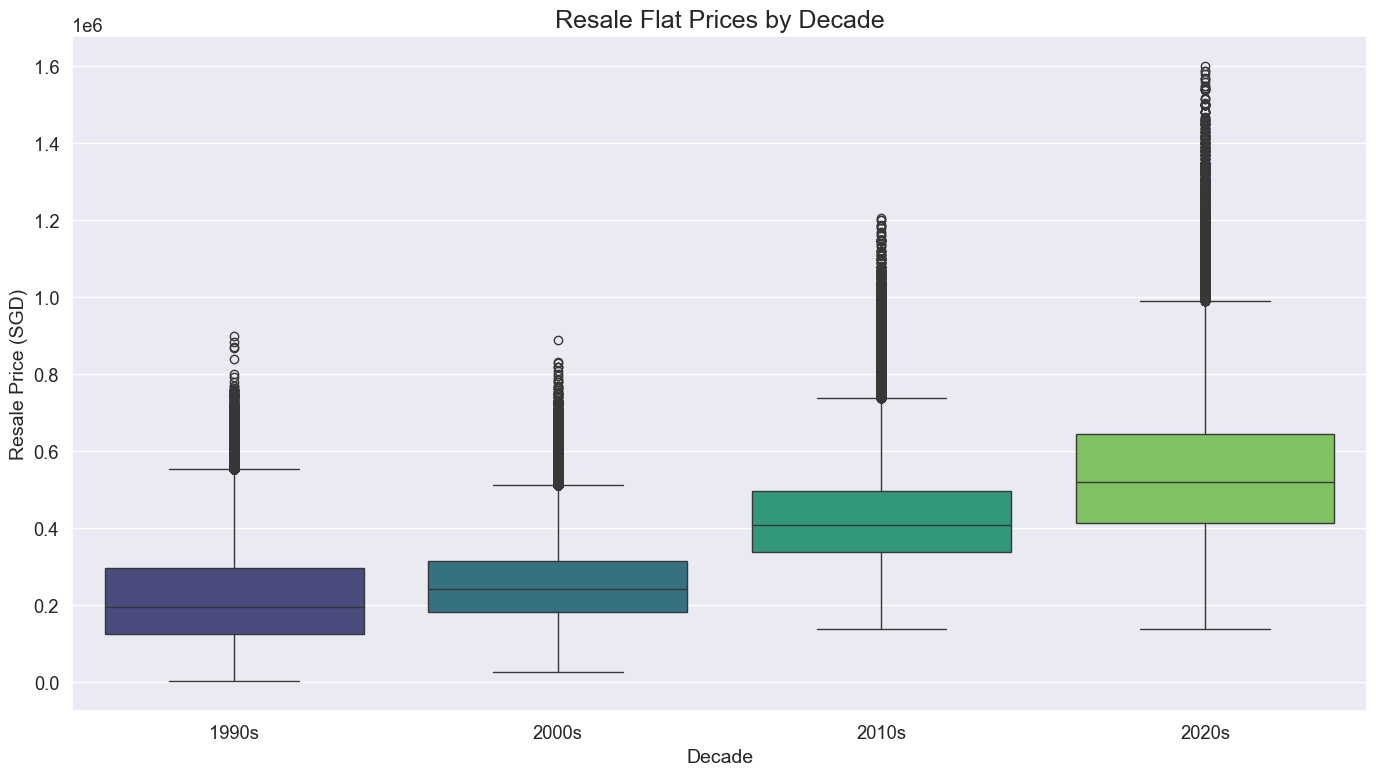

/var/folders/q5/fvpf7hdn6856crg46p1mkjrm0000gn/T/ipykernel_78550/903819741.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='decade_label', y='price_per_sqm', data=df, palette='plasma')


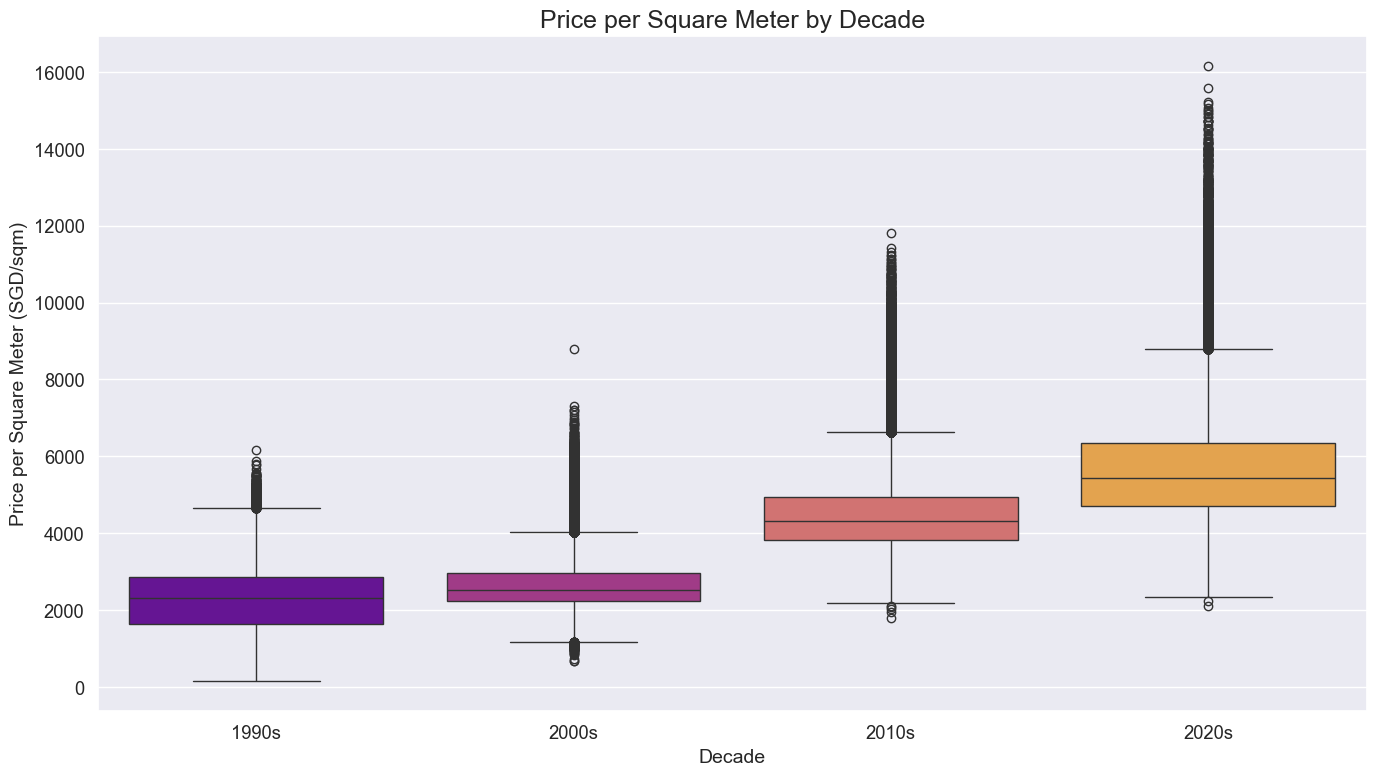

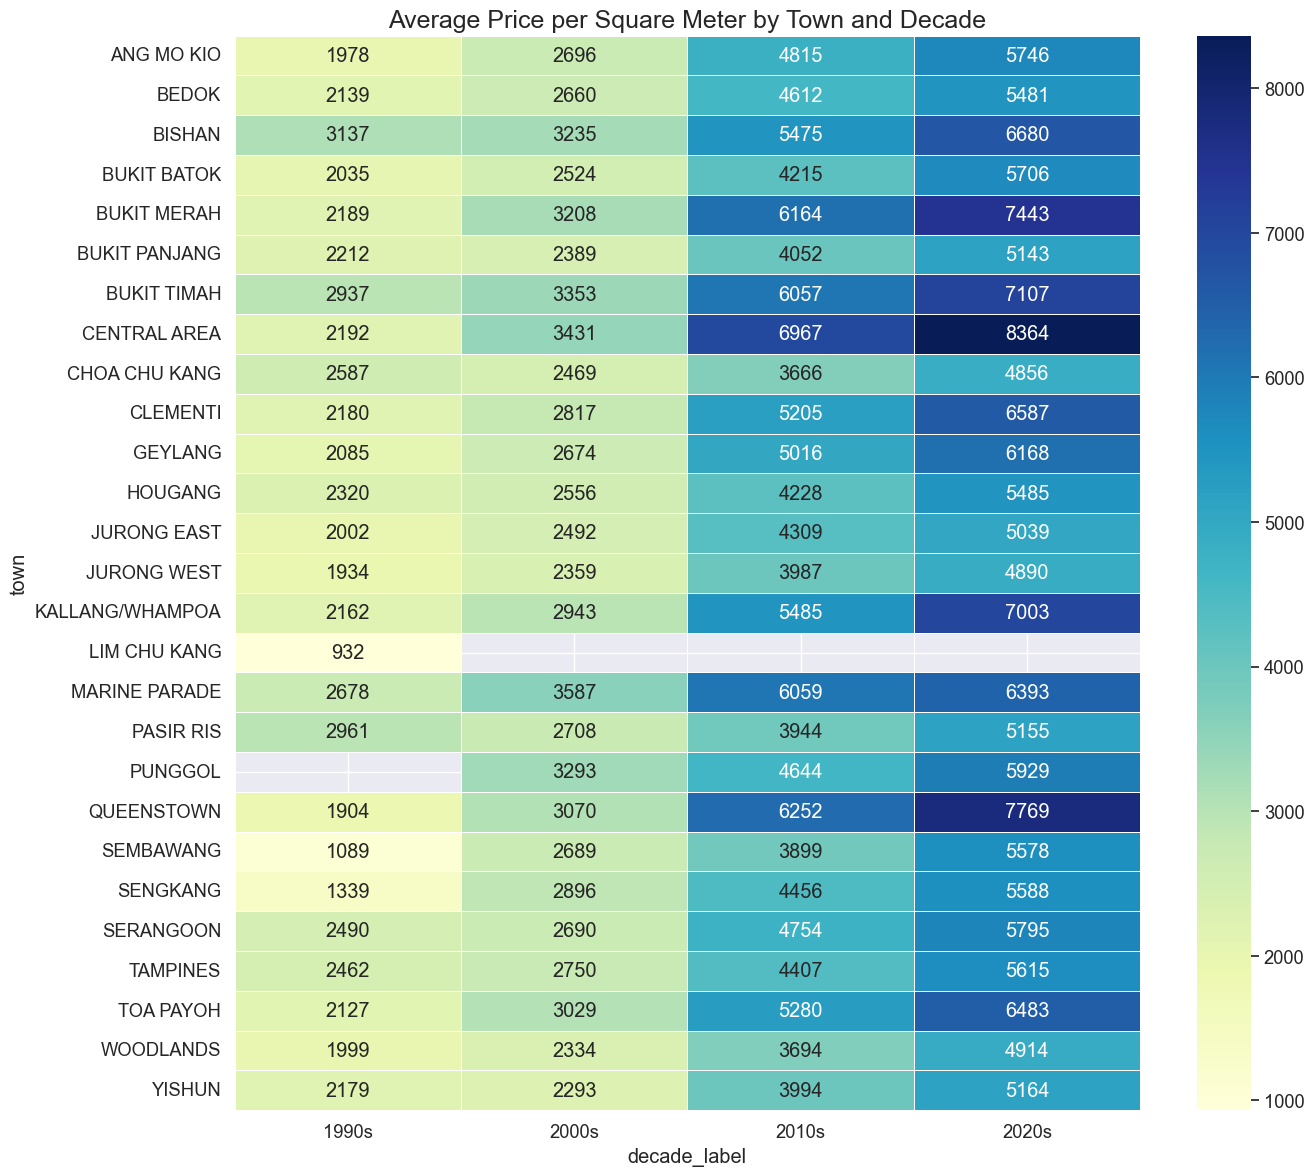

In [24]:
# Create a decade column for period comparison
df['decade'] = (df['year'] // 10) * 10
decade_mapping = {
    1990: '1990s',
    2000: '2000s',
    2010: '2010s', 
    2020: '2020s'
}
df['decade_label'] = df['decade'].map(decade_mapping)

# Price comparison by decade
plt.figure(figsize=(14, 8))
sns.boxplot(x='decade_label', y='resale_price', data=df, palette='viridis')
plt.title('Resale Flat Prices by Decade', fontsize=18)
plt.xlabel('Decade', fontsize=14)
plt.ylabel('Resale Price (SGD)', fontsize=14)
plt.tight_layout()
plt.show()

# Price per square meter comparison by decade
if 'floor_area_sqm' in df.columns:
    # Calculate price per square meter
    df['price_per_sqm'] = df['resale_price'] / df['floor_area_sqm']
    
    plt.figure(figsize=(14, 8))
    sns.boxplot(x='decade_label', y='price_per_sqm', data=df, palette='plasma')
    plt.title('Price per Square Meter by Decade', fontsize=18)
    plt.xlabel('Decade', fontsize=14)
    plt.ylabel('Price per Square Meter (SGD/sqm)', fontsize=14)
    plt.tight_layout()
    plt.show()
    
    # Heatmap of average price per sqm by town and decade
    town_decade_avg = df.groupby(['town', 'decade_label'])['price_per_sqm'].mean().reset_index()
    town_decade_pivot = town_decade_avg.pivot(index='town', columns='decade_label', values='price_per_sqm')
    
    plt.figure(figsize=(14, 12))
    sns.heatmap(town_decade_pivot, annot=True, fmt='.0f', cmap='YlGnBu', linewidths=0.5)
    plt.title('Average Price per Square Meter by Town and Decade', fontsize=18)
    plt.tight_layout()
    plt.show()

In [27]:
# Time series forecasting with a simple linear model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Prepare data for price prediction
if len(yearly_avg) > 10:  # Only if we have enough yearly data
    # Convert years to numerical features for the model
    X = yearly_avg[['year']]
    y = yearly_avg['resale_price']
    
    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Create and train the model
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    # Make predictions for future years
    future_years = pd.DataFrame({'year': range(yearly_avg['year'].max() + 1, yearly_avg['year'].max() + 6)})
    future_predictions = model.predict(future_years)
    
    # Plot actual data and predictions
    plt.figure(figsize=(16, 8))
    plt.plot(yearly_avg['year'], yearly_avg['resale_price'], marker='o', label='Historical Data')
    plt.plot(future_years['year'], future_predictions, marker='x', linestyle='--', color='red', label='Price Forecast')
    plt.title('Singapore Resale Flat Price Forecast', fontsize=18)
    plt.xlabel('Year', fontsize=14)
    plt.ylabel('Average Resale Price (SGD)', fontsize=14)
    plt.grid(True, alpha=0.3)
    plt.legend()
    plt.tight_layout()
    plt.show()
    
    # Print model coefficients
    print(f"Linear model coefficient: {model.coef_[0]:.2f}")
    print(f"Linear model intercept: {model.intercept_:.2f}")
    print(f"This suggests an average yearly price increase of SGD {model.coef_[0]:.2f}")

ModuleNotFoundError: No module named 'sklearn'